# Support Vector Machines (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples=40,n_features=2, centers=2, random_state=6)
print (X[:3])
print(y[:3])

[[  6.37734541 -10.61510727]
 [  6.50072722  -3.82403586]
 [  4.29225906  -8.99220442]]
[1 0 1]


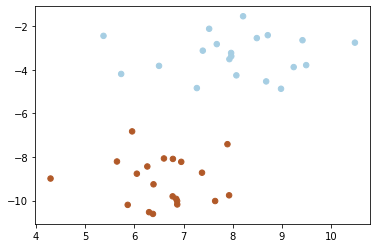

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

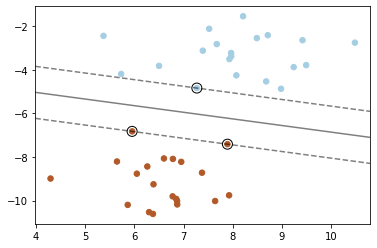

In [4]:
# fit the model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Regularization

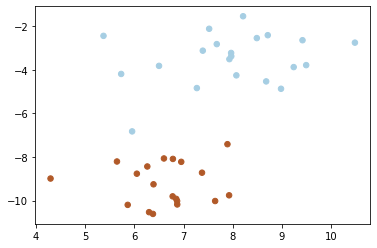

In [5]:
#Lets add some noise
y[21]=0

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

#### Lets check how C parameter affect the Decision Boundary

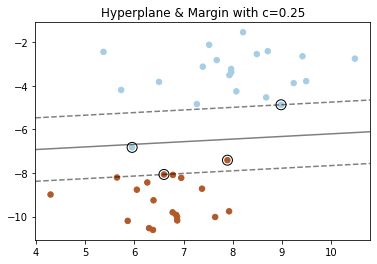

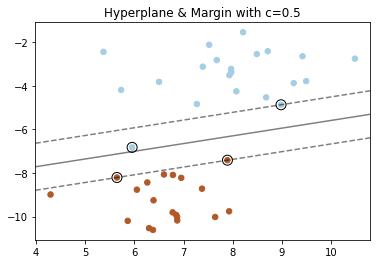

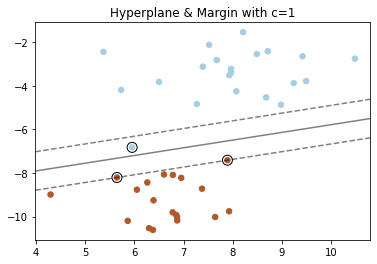

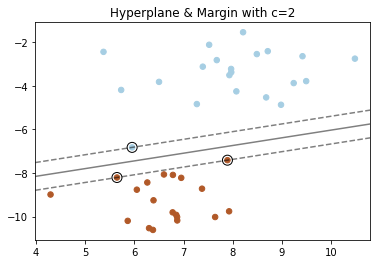

In [6]:
powers = range(-2,2)
Cs = [2**p for p in powers]
for c in Cs:
        # fit the model, don't regularize for illustration purposes
        clf = svm.SVC(kernel='linear', C=c)
        clf.fit(X, y)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])

        # plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
        plt.title("Hyperplane & Margin with c=%s"%c)
        plt.show()

We can see that :
* the **smaller C** gets,regularization strength increases hence SVM classifier prioritize **simplicity** and will choose a large margin decision boundary at the expense of larger number of misclassifications (avoiding Overfitting).
* the **higher C** gets, regularization strength reduces.hence SVM classifier prioritize **making few mistakes** and will choose a low margin decision boundary and try to minimize the misclassifications (can cause Overfitting) .
